In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so
import plotly.express as px

#Import necessary libraries for visualizing and dataframes

In [2]:
#Creating a list of all files specified by month number
all_files = ["filtered_netrics_latency_202201.csv", "filtered_netrics_latency_202207.csv",
             "filtered_netrics_latency_202202.csv", "filtered_netrics_latency_202208.csv",
            "filtered_netrics_latency_202203.csv",  "filtered_netrics_latency_202209.csv",
            "filtered_netrics_latency_202204.csv",  "filtered_netrics_latency_202210.csv",
            "filtered_netrics_latency_202205.csv",  "filtered_netrics_latency_202211.csv",
            "filtered_netrics_latency_202206.csv",  "filtered_netrics_latency_202212.csv"]

In [3]:
#checking the first index of the 
all_files[0]

'filtered_netrics_latency_202201.csv'

In [4]:
#creating a variable for the path string
path="/srv/data/my_shared_data_folder//iet_2022/"

In [5]:
#creating a list for of column names
columns = ['time','deviceid','tool','direction','protocol','target','pktloss','method','zip','isp','value','topic','annonipaddr','ipaddrchanged']

In [6]:
#making an initial dataframe that only has january
data2022 = pd.read_csv(path + 'filtered_netrics_latency_202201.csv',names=columns)
data2022.head()

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged
0,2022-01-03 18:26:07,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Atlanta,0.0,avg,60649,att,43.394,chicago,108.237.217.0,0
1,2022-01-03 18:26:07,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Atlanta,0.0,max,60649,att,44.146,chicago,108.237.217.0,0
2,2022-01-03 18:26:07,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Atlanta,0.0,mdev,60649,att,0.514,chicago,108.237.217.0,0
3,2022-01-03 18:26:07,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Atlanta,0.0,min,60649,att,42.709,chicago,108.237.217.0,0
4,2022-01-03 18:26:07,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Chicago,0.0,avg,60649,att,20.881,chicago,108.237.217.0,0


In [7]:
#created a for loop that adds all the csv files from the all_files list and adds it to the initial list
for file in all_files:
    df = pd.read_csv(path + file, names=columns)
    data2022 = pd.concat([data2022,df])
    

In [8]:
#puts the data in chronological order
data2022 = data2022.sort_values(by=['time'])
data2022.tail()

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged
157473,2022-11-19 05:55:59,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,amazon,0.0,min,60649,att,10.646,chicago,73.176.1.0,0
157472,2022-11-19 05:55:59,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,amazon,0.0,mdev,60649,att,1.962,chicago,73.176.1.0,0
157471,2022-11-19 05:55:59,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,amazon,0.0,max,60649,att,16.883,chicago,73.176.1.0,0
157480,2022-11-19 05:55:59,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,google,0.0,mdev,60649,att,1.432,chicago,73.176.1.0,0
157476,2022-11-19 05:55:59,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,facebook,0.0,mdev,60649,att,0.943,chicago,73.176.1.0,0


In [9]:
#sorted out the avg method from the original df
data2022_avg = data2022.loc[data2022['method'] == 'avg']
data2022_avg.head()

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged
555961,2021-12-31 18:00:05,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,google,9.09091,avg,60649,att,108.639,chicago,108.237.217.0,0
555961,2021-12-31 18:00:05,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,google,9.09091,avg,60649,att,108.639,chicago,108.237.217.0,0
538492,2021-12-31 18:01:33,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Chicago,0.00000,avg,60649,att,22.307,chicago,108.237.217.0,0
538540,2021-12-31 18:01:33,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,tribune,0.00000,avg,60649,att,34.187,chicago,108.237.217.0,0
538536,2021-12-31 18:01:33,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,suntimes,0.00000,avg,60649,att,34.252,chicago,108.237.217.0,0


In [10]:
#create a new dataframe with only Atlanta, Seattle, and Chicago
data2022_serv = data2022_avg.loc[data2022_avg['target'].isin(['Atlanta', 'Seattle', 'Chicago'])]
data2022_serv.head()

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged
538492,2021-12-31 18:01:33,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Chicago,0.0,avg,60649,att,22.307,chicago,108.237.217.0,0
538488,2021-12-31 18:01:33,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Atlanta,0.0,avg,60649,att,95.486,chicago,108.237.217.0,0
538492,2021-12-31 18:01:33,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Chicago,0.0,avg,60649,att,22.307,chicago,108.237.217.0,0
538508,2021-12-31 18:01:33,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Seattle,0.0,avg,60649,att,84.930,chicago,108.237.217.0,0
538488,2021-12-31 18:01:33,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Atlanta,0.0,avg,60649,att,95.486,chicago,108.237.217.0,0


In [11]:
#Created functions to split the time column by date, time, & month
def split_hour(x):
    row = x
    return row[11:13]

def split_date(x):
    row = x
    return row[5:10]
def split_month(x):
    row = x
    return row[5:7]

#Created individual columns for hour/date/month
data2022_serv['hour'] = data2022_serv['time'].apply(split_hour)
data2022_serv['date'] = data2022_serv['time'].apply(split_date)
data2022_serv['month'] = data2022_serv['time'].apply(split_month)
data2022_serv.head()

/tmp/ipykernel_2037028/1082007395.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2022_serv['hour'] = data2022_serv['time'].apply(split_hour)
/tmp/ipykernel_2037028/1082007395.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2022_serv['date'] = data2022_serv['time'].apply(split_date)
/tmp/ipykernel_2037028/1082007395.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,time,deviceid,tool,direction,protocol,target,pktloss,method,zip,isp,value,topic,annonipaddr,ipaddrchanged,hour,date,month
538492,2021-12-31 18:01:33,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Chicago,0.0,avg,60649,att,22.307,chicago,108.237.217.0,0,18,12-31,12
538488,2021-12-31 18:01:33,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Atlanta,0.0,avg,60649,att,95.486,chicago,108.237.217.0,0,18,12-31,12
538492,2021-12-31 18:01:33,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Chicago,0.0,avg,60649,att,22.307,chicago,108.237.217.0,0,18,12-31,12
538508,2021-12-31 18:01:33,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Seattle,0.0,avg,60649,att,84.930,chicago,108.237.217.0,0,18,12-31,12
538488,2021-12-31 18:01:33,nm-mngd-20210518-19941862,ping_latency,rtt,icmp,Atlanta,0.0,avg,60649,att,95.486,chicago,108.237.217.0,0,18,12-31,12


In [12]:
#We need this code to show what the standard deviation threshold is.
def anomaly_detec (x):
    stdev_threshold = x.std()*2 + x.mean()
    print(stdev_threshold)
    anomaly_count = x >= stdev_threshold
    return anomaly_count

anomaly_detec(data2022_serv['value']).head()

119.59593364824433


538492    False
538488    False
538492    False
538508    False
538488    False
Name: value, dtype: bool

In [13]:
#Created a column that identified whether there was an anomaly in each row
data2022_serv["anomalytotal"] = anomaly_detec(data2022_serv['value'])

pd.set_option('display.max_rows', None)


119.59593364824433


/tmp/ipykernel_2037028/2981494523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2022_serv["anomalytotal"] = anomaly_detec(data2022_serv['value'])


In [14]:
data2022_serv["anomalytotal"].tail()

164977    False
164993    False
157454    False
157438    False
157434    False
Name: anomalytotal, dtype: bool

In [15]:
#Created a df that only displayed the month, date, target, and anomaly total for that day per server
anomaly_2022 = data2022_serv.groupby(['month','date','target'])[['anomalytotal']].sum()
anomaly_2022.head()

anomalytotal
month date  target               
01    01-01 Atlanta            40
            Chicago            14
            Seattle            50
      01-02 Atlanta            78
            Chicago            46

In [16]:
#This df shows the median anomalies per month per server
#Had to reset the index at this point in order for the dropdwn code to read the month column
anomalymonth_2022 = anomaly_2022.groupby(['month','target'])[['anomalytotal']].median().reset_index()
anomalymonth_2022


,month,target,anomalytotal
0,01,Atlanta,28.0
1,01,Chicago,14.0
2,01,Seattle,42.0
3,02,Atlanta,15.5
4,02,Chicago,13.0
5,02,Seattle,21.5
6,03,Atlanta,12.0
7,03,Chicago,7.0
8,03,Seattle,18.0
9,04,Atlanta,0.0


In [17]:
import plotly.graph_objs as go

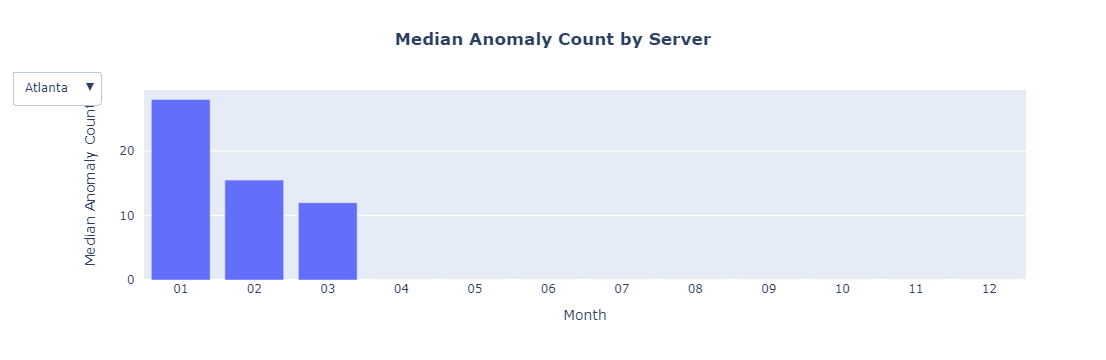

In [32]:
#Created a df that separated each target in order to create a plot per target
atl = anomalymonth_2022.loc[anomalymonth_2022['target'] == 'Atlanta']
stl = anomalymonth_2022.loc[anomalymonth_2022['target'] == 'Seattle']
chi = anomalymonth_2022.loc[anomalymonth_2022['target'] == 'Chicago']

fig2 = go.Figure()

# Adding Atlanta bar plot
fig2.add_trace(
    go.Bar(
        y=list(atl['anomalytotal']),
        x=list(atl['month']),
        name='Altanta',
    )
)

# Adding Seattle bar plot
fig2.add_trace(
    go.Bar(
        y=list(stl['anomalytotal']),
        x=list(stl['month']),
        name='Seattle',
        visible=False,
    )
)

# Adding Chicago bar plot
fig2.add_trace(
    go.Bar(
        y=list(chi['anomalytotal']),
        x=list(chi['month']),
        name='Chicago',
        visible=False,
    )
)

# Minor layout adjustments
fig2.update_layout(title=('<b>Median Anomaly Count by Server</b>'), 
                  title_x=0.5,
                  margin=dict(t=90),
                  yaxis=dict( ticksuffix="  ", title="Median Anomaly Count"),
                   xaxis=dict(title="Month") 
                  )                
#Creating dropdown menu with names
fig2.update_layout(
    updatemenus=[
        dict(
            xanchor='left',
            x=-0.15,
            yanchor='top',
            y=1.1,
            active=0,
            buttons=list([
                dict(label="Atlanta",
                     method="update",
                     args=[{"visible": [True, False, False]}]
                    ),
                dict(label="Seattle",
                     method="update",
                     args=[{"visible": [False, True, False]}]
                    ),
                dict(label="Chicago",
                     method="update",
                     args=[{"visible": [False, False, True]}]
                    )
            ]),
        )
    ])
fig2.show()
#fig2.write_html('monthdropwdown.html')

In [19]:
#Rahim's version


# Create a trace for each city
traces = [go.Bar(x=df[df['City'] == city]['Month'], 
                 y=df[df['City'] == city]['Value'], 
                 name=city, visible=(i==0)) 
          for i, city in enumerate(cities)]

# Create the layout
layout = go.Layout(
    title="Daily Median Anomalies by Month",
    xaxis=dict(title='Month'),
    yaxis=dict(title='Daily Median Anomalies'),
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["visible", [i==j for i in range(len(cities))]],
                    label=cities[j],
                    method="restyle"
                ) for j in range(len(cities))
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

fig

NameError: name 'cities' is not defined